<a href="https://colab.research.google.com/github/6kitty/IP01069/blob/main/IP01069_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **확률적 경사 하강법**

# **SGDClassifier**

In [ ]:
!git clone https://github.com/Ankit152/Fish-Market.git

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv("/content/Fish-Market/Fish.csv")

fish_data = data[['Species', 'Weight', 'Length2', 'Length3', 'Height', 'Width']].copy()
fish_data.columns = ['Species', 'Weight', 'Length', 'DIagonal', 'Height', 'Width']

fish_data.to_csv('Fish_csv_data.csv', index=False)

fish=pd.read_csv('Fish_csv_data.csv')
fish.head()
fish_input=fish[['Weight', 'Length', 'DIagonal', 'Height', 'Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

Cloning into 'Fish-Market'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16 (delta 2), reused 7 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (16/16), 16.80 KiB | 8.40 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
from sklearn.linear_model import SGDClassifier
sc=SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7983193277310925
0.775


In [ ]:
sc=SGDClassifier(loss='log_loss', random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

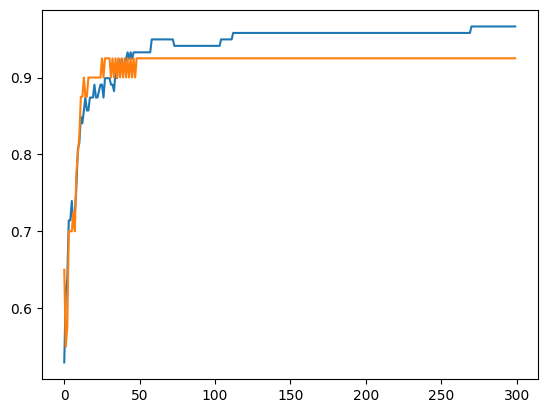

In [ ]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.show()

# **에포크와 과대/과소적합**

In [ ]:
sc=SGDClassifier(loss='log_loss',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [ ]:
sc=SGDClassifier(loss='hinge',max_iter=1000,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925


# **응용 예제**
**Iris Flower Dataset으로 SGDClassifier(손실함수=log)을 사용하여 최적의 에포크 횟수를 구하는 과정을 보이시오.(https://www.kaggle.com/datasets/arshid/iris-flower-dataset)**


In [1]:
!curl -L -o sample_data/iris-flower-dataset.zip https://www.kaggle.com/api/v1/datasets/download/arshid/iris-flower-dataset
!unzip sample_data/iris-flower-dataset.zip -d sample_data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1010  100  1010    0     0   1433      0 --:--:-- --:--:-- --:--:-- 11477
Archive:  sample_data/iris-flower-dataset.zip
  inflating: sample_data/IRIS.csv    


In [10]:
import pandas as pd
iris=pd.read_csv("/content/sample_data/IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris_input=iris[['sepal_length','sepal_width','petal_length','petal_width']]
iris_target=iris['species']

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(iris_input, iris_target, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [14]:
from sklearn.linear_model import SGDClassifier

sc=SGDClassifier(loss='log_loss',random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9375
1.0


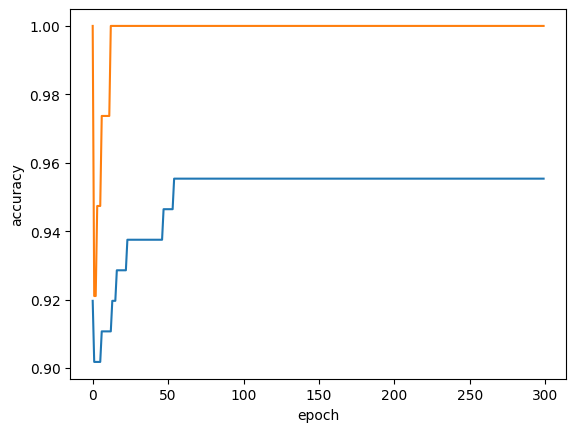

Optimal epoch: 1


In [15]:
import numpy as np

train_score=[]
test_score=[]

classes = np.unique(train_target)

for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()



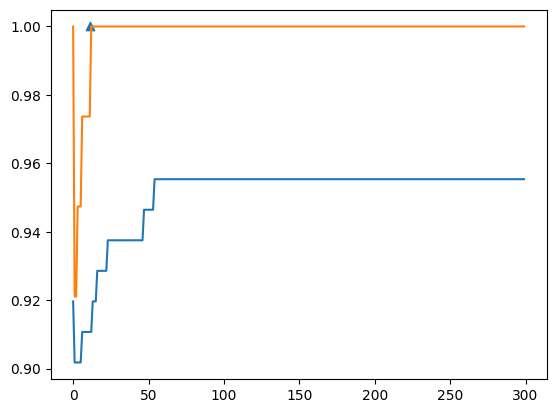

In [26]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.scatter(11,np.max(test_score),marker='^') # 11 또는 12
plt.show()


In [29]:
sc=SGDClassifier(loss='log_loss',max_iter=11,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8392857142857143
0.9210526315789473


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [27]:
sc=SGDClassifier(loss='log_loss',max_iter=12,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

# 11보다 12을 epoch값으로 설정했을 때 score가 더 높게 나온다.
# 최적의 epoch 횟수 == 12

0.9017857142857143
0.9736842105263158


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
